In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

from scroutines import powerplots

In [2]:
outdir = "/data/qlyu/v1/results_merfish/plots_230621"
outdatadir = "/data/qlyu/v1/results_merfish"
!mkdir -p $outdir

In [3]:
f1 = '/data/qlyu/v1/data/merfish/merfish_06142023/ant/region1/cell_by_gene.csv'
f2 = '/data/qlyu/v1/data/merfish/merfish_06142023/ant/region1/cell_metadata.csv'
output = outdatadir + '/ant_reg1_230719.h5ad'

df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)

df1.shape, df2.shape

((330729, 551), (330729, 17))

In [4]:
genes = df1.iloc[:,1:-50].columns
blnks = df1.iloc[:, -50:].columns
df = df2.join(df1)
assert np.all(df['cell'] == df['EntityID'])
len(genes), len(blnks)

(500, 50)

In [5]:
# sns.histplot(df2['volume'], cumulative=True, element='step')

In [6]:
# sns.histplot(df1[blnks].sum(axis=1), cumulative=True, element='step')

<Axes: xlabel='gncov', ylabel='Count'>

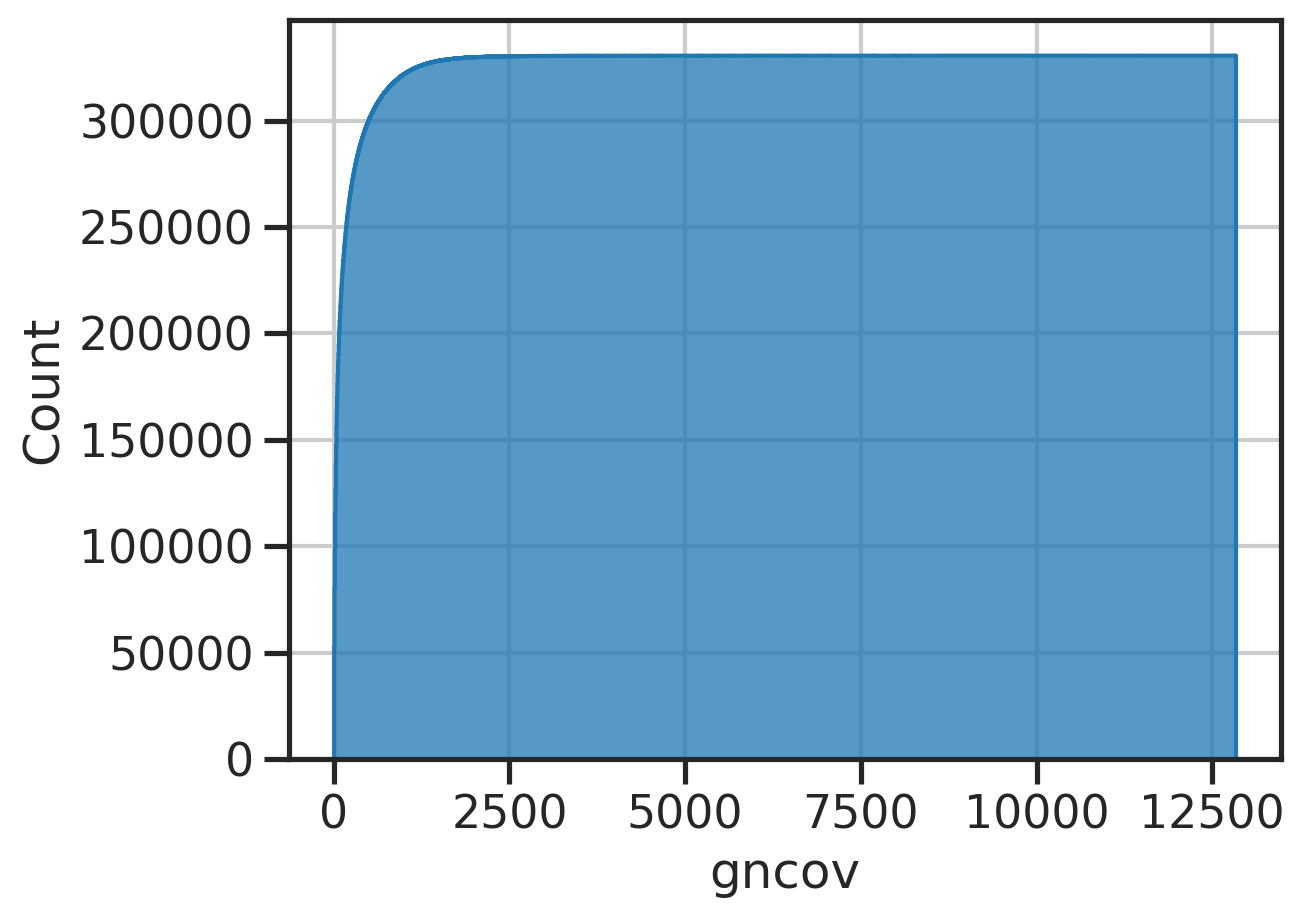

In [7]:
df['fpcov'] = df[blnks].sum(axis=1)
df['gncov'] = df[genes].sum(axis=1)
sns.histplot(df['gncov'], cumulative=True, element='step')

In [8]:
print(df.shape)
cond = np.all([
    df['volume'] < 5000, 
    df['fpcov'] < 5,
    df['gncov'] > 10,
], axis=0)

df = df[cond] 
print(df.shape)

(330729, 570)
(226332, 570)


In [9]:
# functions (the teacher wrote for you to use later)
def rot2d(x, y, theta, unit='degree'):
    """ rotate data points defined by `x` and `y` by `theta` degree
    """
    a = np.vstack([x,y]).T
    if unit == 'degree':
        theta = theta*np.pi/180 # convert to radian

    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    ar = a.dot(R.T)
    return ar[:,0], ar[:,1]

def st_scatter(x, y, gexp=None, vmax_p=98, title='', s=1, cbar_label='', output='', cmap='rocket_r', axis_off=True):
    """customized scatter plot -- yesterday's progress
    """
  
    fig, ax = plt.subplots(figsize=(10,8))
    if gexp is not None:
        vmax = np.percentile(gexp, vmax_p)
        g = ax.scatter(x, y, c=gexp, s=s, edgecolor='none', vmax=vmax, cmap=cmap, rasterized=True)
        fig.colorbar(g, label=cbar_label, shrink=0.3)
    else:
        g = ax.scatter(x, y, s=s, edgecolor='none', cmap=cmap, rasterized=True)
  
    if axis_off:
        ax.axis('off')
    ax.set_title(title)
    ax.set_aspect('equal')
  
    if output:
        powerplots.savefig_autodate(fig, output)
        
    return 

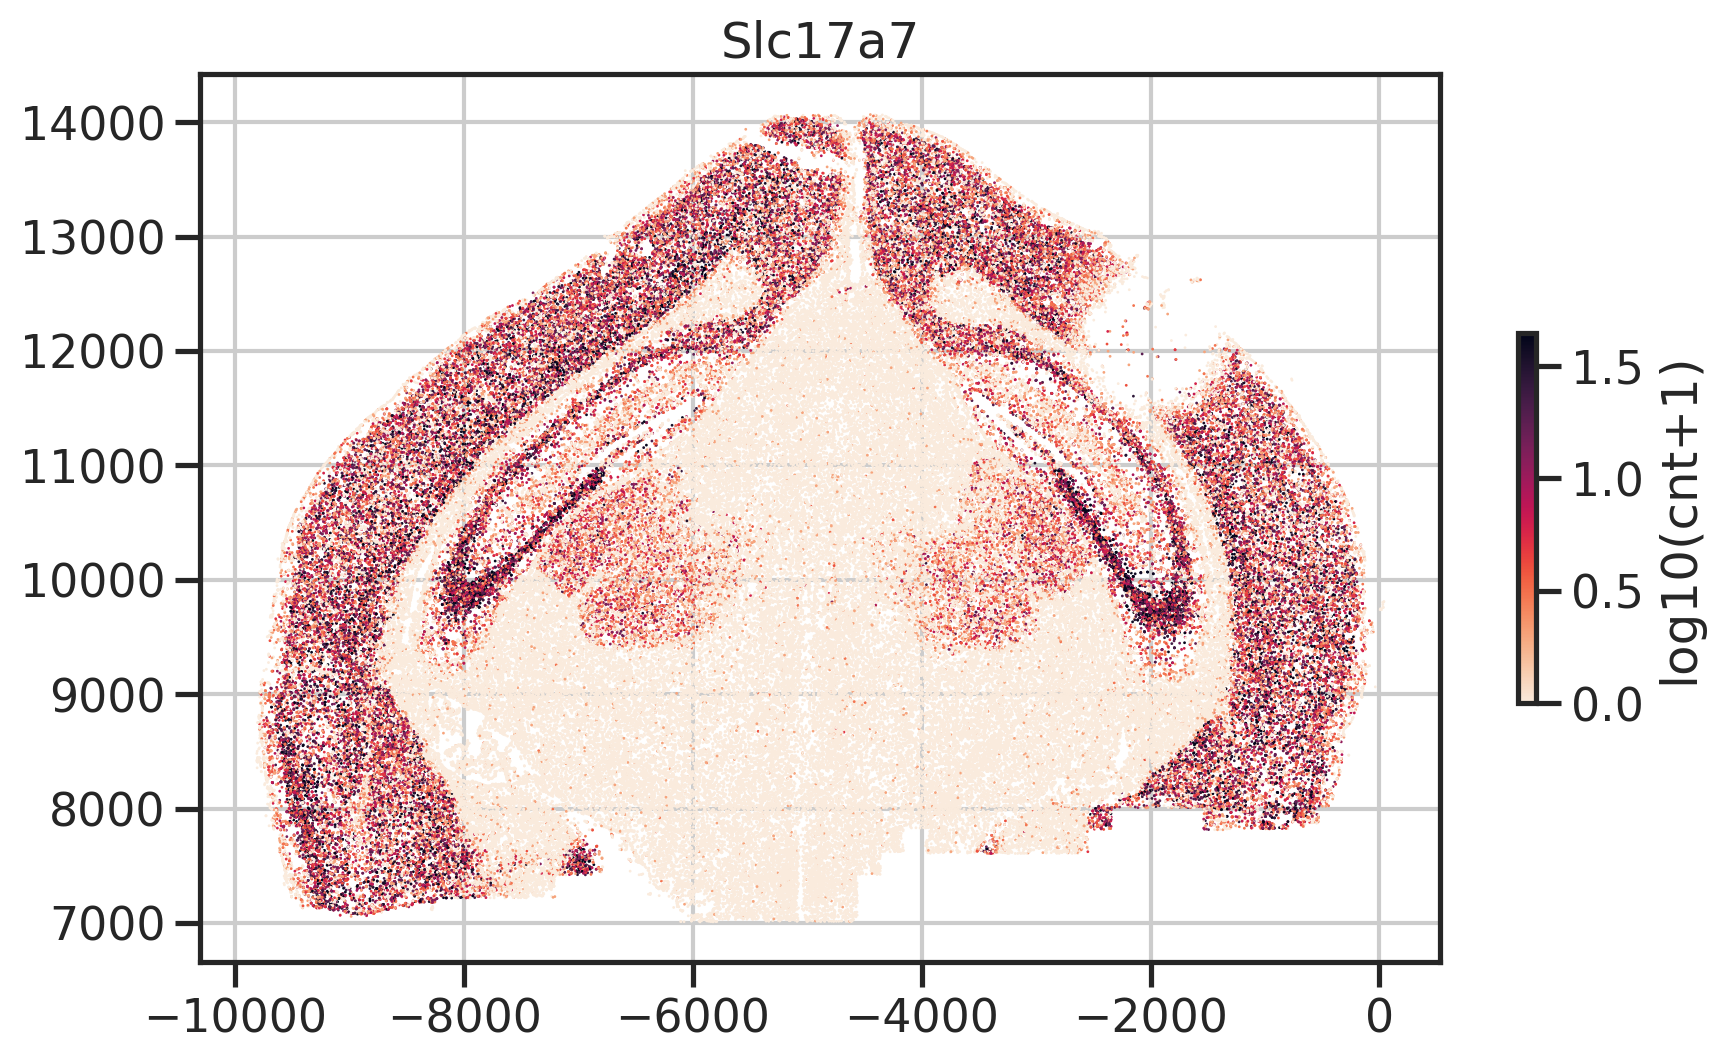

In [10]:
# calibrate coordinates

x = df['center_x']
y = df['center_y']
xr, yr = rot2d(x, y, 90)
df['x'] = xr
df['y'] = yr

gn = 'Slc17a7'
g = np.log10(1+df[gn])
st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', axis_off=False)

In [11]:
# focus on Visual cortex
cond_region = df['y'] > 10000
dfsub = df[cond_region]

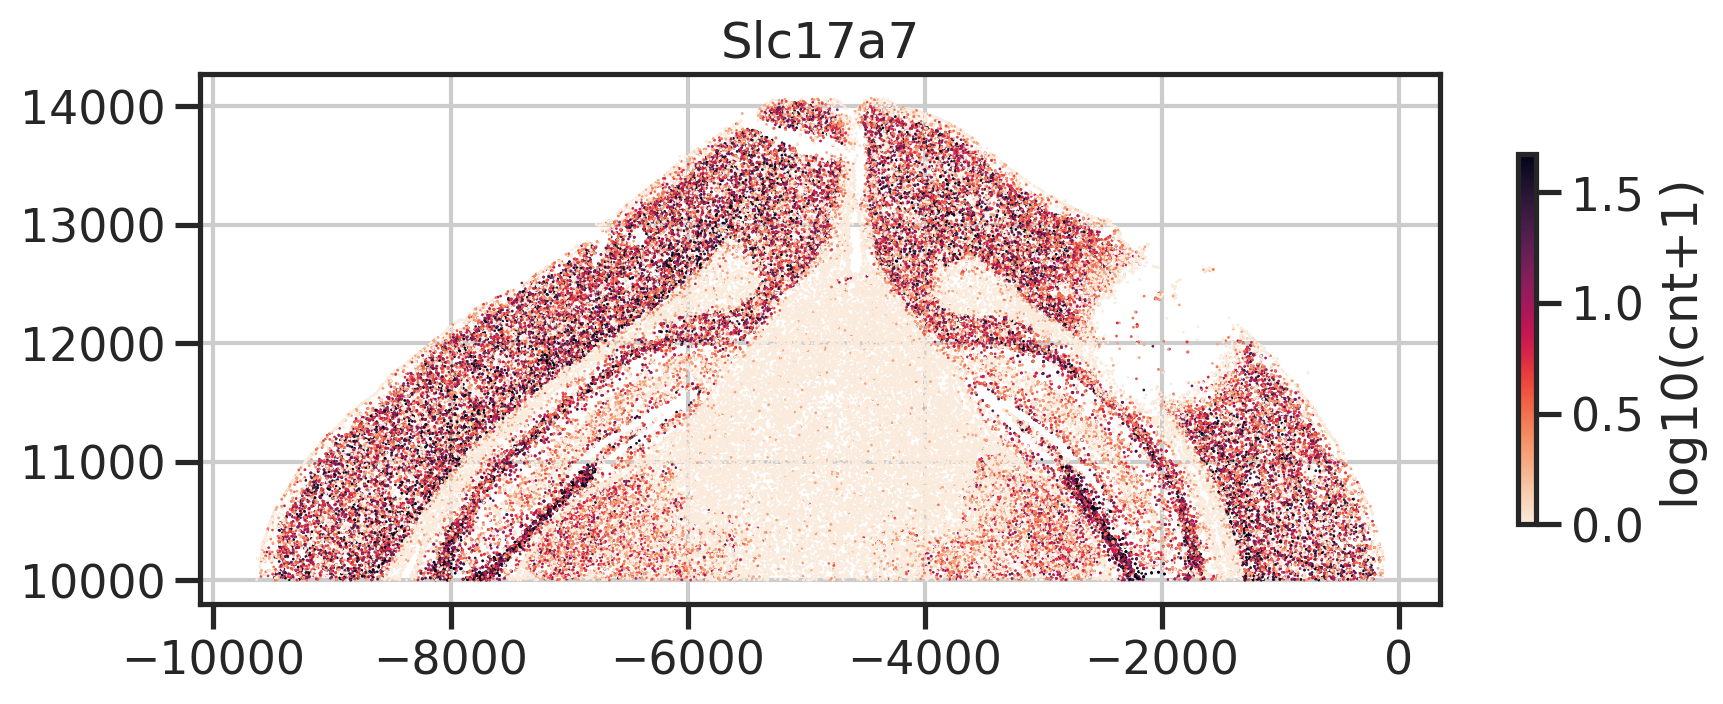

In [12]:
gn = 'Slc17a7'
g = np.log10(1+dfsub[gn])
xr = dfsub['x']
yr = dfsub['y']
st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', axis_off=False)

In [13]:
dfsub

,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,...,Blank-45,Blank-46,Blank-47,Blank-48,Blank-49,Blank-50,fpcov,gncov,x,y
526,2595481500078100001,1771,461.634072,10021.863467,136.868043,10012.392443,121.674174,10032.843719,151.204457,1.602275,...,0,0,0,0,0,0,0,59,-136.868043,10021.863467
527,2595481500078100003,1866,1597.978683,10059.479347,135.352972,10050.904706,127.800966,10067.624021,143.325164,1.128099,...,0,0,0,1,0,0,4,582,-135.352972,10059.479347
528,2595481500078100004,1866,328.498026,10082.904723,139.357865,10071.731877,130.608949,10099.053646,148.574796,1.653483,...,0,0,0,0,0,0,0,53,-139.357865,10082.904723
531,2595481500078100008,1771,388.963851,10044.686094,170.330999,10031.633857,162.342762,10057.040130,179.142366,1.792401,...,0,0,0,0,0,0,0,78,-170.330999,10044.686094
532,2595481500078100009,1866,1838.147059,10100.163908,174.415783,10090.305871,166.438973,10109.828102,186.092905,1.083032,...,0,0,0,0,0,0,0,298,-174.415783,10100.163908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329856,2595481504096100039,1915,145.251761,10395.913931,9548.984313,10393.628518,9545.634065,10397.998343,9553.283371,1.756802,...,0,0,0,0,0,0,0,21,-9548.984313,10395.913931
329857,2595481504096100040,1916,651.066369,10483.413268,9515.295560,10475.215723,9507.518245,10490.331669,9523.215514,1.180602,...,0,0,0,0,0,0,0,32,-9515.295560,10483.413268
329858,2595481504096100041,1916,698.250065,10475.498486,9527.036387,10463.287800,9521.020112,10488.495188,9533.733779,2.803651,...,0,0,0,0,0,0,1,128,-9527.036387,10475.498486
329860,2595481504096100044,1916,209.218386,10459.564762,9532.639743,10455.233979,9528.902115,10464.303771,9537.452022,1.310770,...,0,0,0,0,0,0,0,51,-9532.639743,10459.564762


In [14]:
df2.columns

Index(['EntityID', 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y',
       'max_x', 'max_y', 'anisotropy', 'transcript_count',
       'perimeter_area_ratio', 'solidity', 'PolyT_raw', 'PolyT_high_pass',
       'DAPI_raw', 'DAPI_high_pass'],
      dtype='object')

In [15]:
metacols = np.hstack(['x', 'y', 'gncov', 'fpcov', df2.columns])
adata = ad.AnnData(X=dfsub[genes].values, 
                   obs=dfsub[metacols], 
                   var=pd.DataFrame(index=genes), 
                   obsm=dict(blanks=dfsub[blnks].values),
                  )

/tmp/ipykernel_1713404/4156774178.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=dfsub[genes].values,
/home/qlyu/mambaforge/envs/bbbroutine/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [16]:
adata.write(output)

In [17]:
# for gn in genes:
#     g = np.log10(1+df[gn])
#     output = outdir + f'/{gn}.pdf'
#     print(output)
#     st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', output=output)
#     plt.close()
#     # break